In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dataset_dict = ["circles0.3.csv","halfkernel.csv", "moons1.csv", "spiral1.csv", "twogaussians33.csv", "twogaussians42.csv"]

In [3]:
kf = KFold(n_splits=10,shuffle=True, random_state=42)

<IPython.core.display.Javascript object>

In [4]:
predictive_models = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=1)  # You can vary k here
}

In [5]:
def calculate_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    true_positive = cm[1, 1]
    true_negative = cm[0, 0]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]
    
    ppv = true_positive / (true_positive + false_positive)  # Positive Predictive Value (Precision)
    npv = true_negative / (true_negative + false_negative)  # Negative Predictive Value
    specificity = true_negative / (true_negative + false_positive)
    sensitivity = true_positive / (true_positive + false_negative)  # True Positive Rate (Recall)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    
    return ppv, npv, specificity, sensitivity, accuracy

In [6]:
for data in dataset_dict:
    df = pd.read_csv(data)

    M = df.drop(columns='label')
    n = df['label']
    numpy_array = M.to_numpy()
    

    results=[]
    for classifier_name, classifier in predictive_models.items():
        for dataset_name, M, n in [(data, M, n)]:
            # Fit the classifier on the training data
            classifier.fit(M, n)

            # Make predictions using 10-fold cross-validation
            y_pred = cross_val_predict(classifier, M, n, cv=10)

            ppv, npv, specificity, sensitivity, accuracy = calculate_metrics(n, y_pred)
            results.append([classifier_name, dataset_name, ppv, npv, specificity, sensitivity, accuracy])

        # Create a DataFrame to store the results
        results_df = pd.DataFrame(results, columns=["Classifier", "Dataset", "PPV", "NPV", "Specificity", "Sensitivity", "Accuracy"])

    # Print the results
    print('************************************'+data+'******************************************\n')
    print(results_df)
    print()
    

************************************circles0.3.csv******************************************

    Classifier         Dataset       PPV       NPV  Specificity  Sensitivity  \
0          LDA  circles0.3.csv  0.462406  0.457265        0.428        0.492   
1          QDA  circles0.3.csv  1.000000  0.980392        1.000        0.980   
2  Naive Bayes  circles0.3.csv  1.000000  0.980392        1.000        0.980   
3          KNN  circles0.3.csv  1.000000  1.000000        1.000        1.000   

   Accuracy  
0      0.46  
1      0.99  
2      0.99  
3      1.00  

************************************halfkernel.csv******************************************

    Classifier         Dataset       PPV       NPV  Specificity  Sensitivity  \
0          LDA  halfkernel.csv  0.679325  0.661597        0.696        0.644   
1          QDA  halfkernel.csv  0.954262  0.921002        0.956        0.918   
2  Naive Bayes  halfkernel.csv  0.960499  0.926782        0.962        0.924   
3          KNN  half

In [7]:
KNN=KNeighborsClassifier(n_neighbors=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'circles0.3.csv': 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

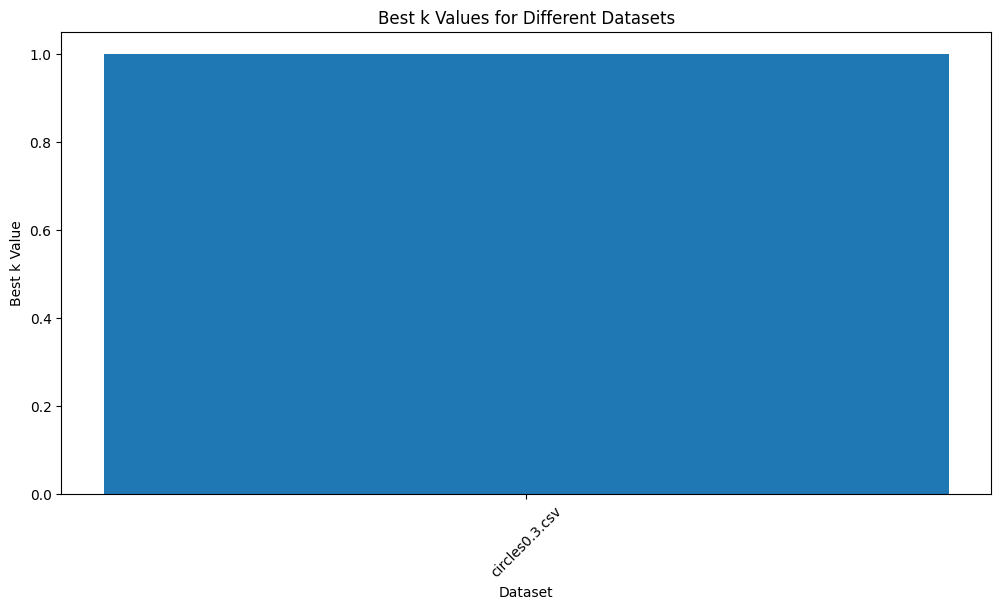

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'halfkernel.csv': 1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

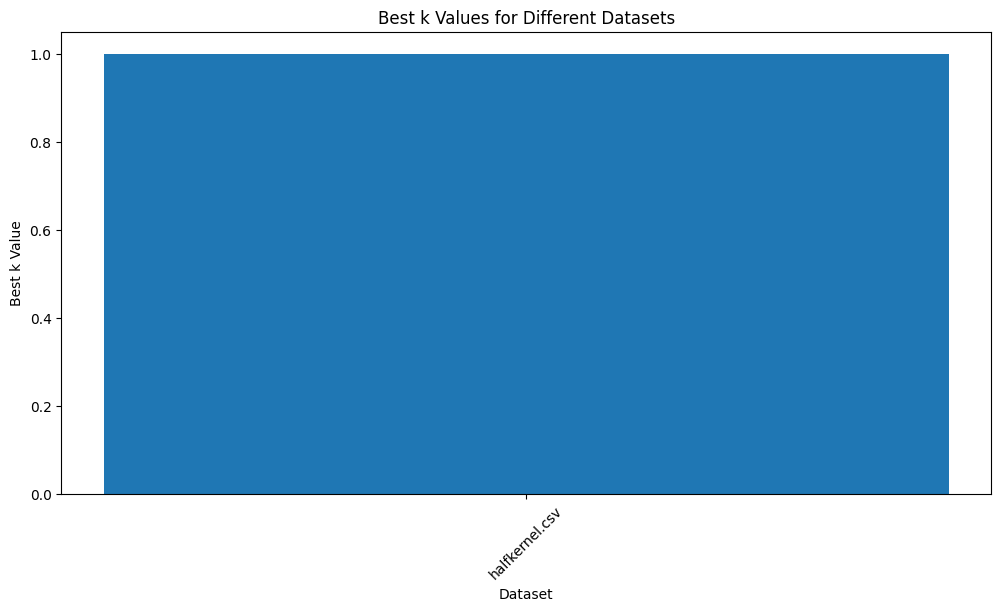

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'moons1.csv': 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

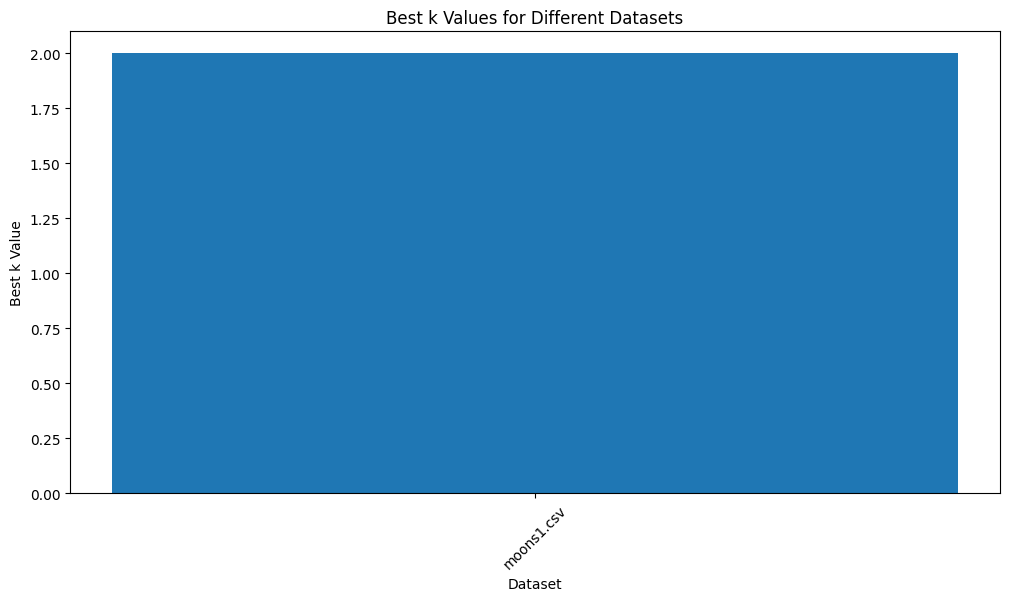

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'spiral1.csv': 5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

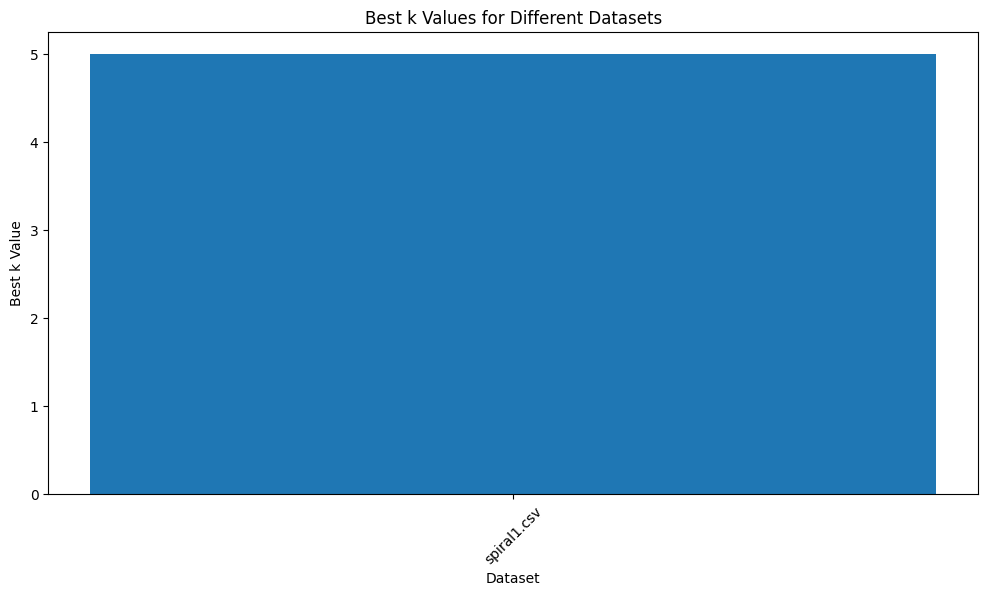

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'twogaussians33.csv': 3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

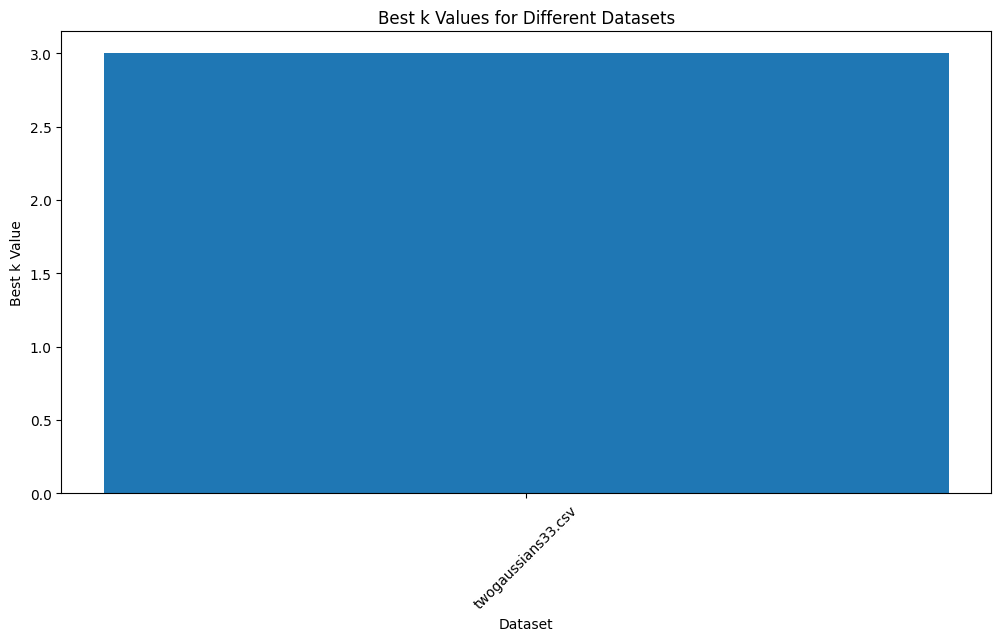

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best k for 'twogaussians42.csv': 6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

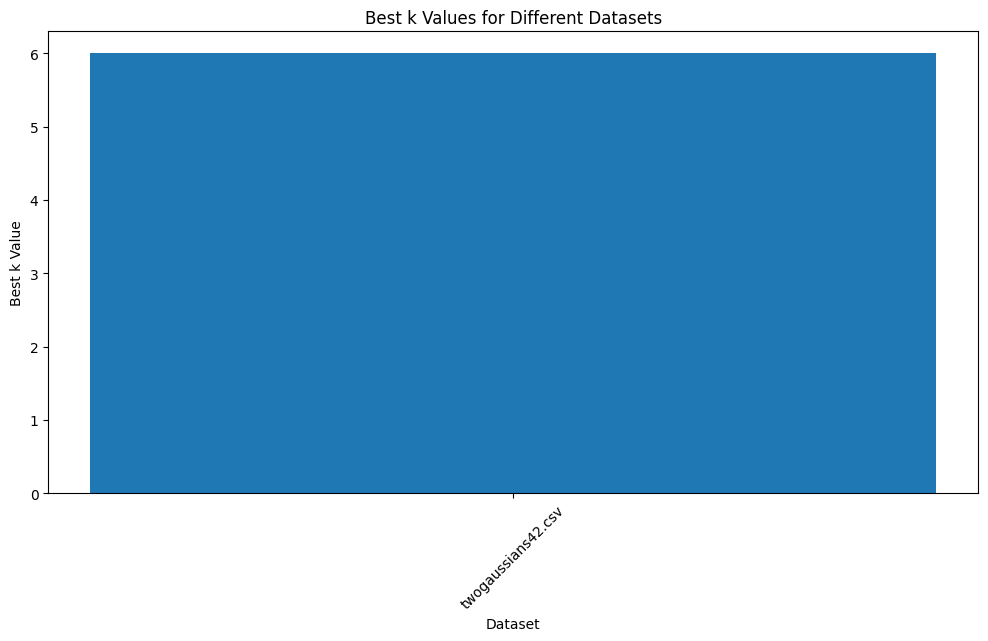

In [8]:
k_values = list(range(1, 10))

for data in dataset_dict:
    df = pd.read_csv(data)

    M = df.drop(columns='label')
    n = df['label']
    numpy_array = M.to_numpy()
    

    results = {}

    for dataset_name, M, n in [(data, M, n)]:

        dataset_res = []
        for k in k_values:
            KNN=KNeighborsClassifier(n_neighbors=k)


            # Make predictions using 10-fold cross-validation
            scores_KNN = cross_val_score(KNN, M, n, cv=10, scoring="accuracy")
            mean_accuracy = np.mean(scores_KNN)
            
            dataset_res.append((k, mean_accuracy))


        results[dataset_name] = dataset_res

    def find_max_metric(result_list):
        max_value = -1  # Initialize to a very low value
        best_k = None

        for k, metric in result_list:
            if metric > max_value:
                max_value = metric
                best_k = k

        return best_k

    best_k_values = {dataset_name: find_max_metric(dataset_results) for dataset_name, dataset_results in results.items()}


    for dataset_name, best_k in best_k_values.items():
        print(f"Best k for '{dataset_name}': {best_k}")
    
    
    # Create a bar chart to visualize the best k values for each dataset
    plt.figure(figsize=(12, 6))
    plt.bar(best_k_values.keys(), best_k_values.values())
    plt.title('Best k Values for Different Datasets')
    plt.xlabel('Dataset')
    plt.ylabel('Best k Value')
    plt.xticks(rotation=45)
    plt.show()